# <span style='color:Blue'> STUDENT PERFORMANCE ANALYSIS </span>

## 1. Import Libraries
To develop our prediction model, we need to import the necessary Python libraries:

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy.stats import loguniform
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV, StratifiedKFold

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Ridge

%matplotlib inline
sns.set_style('whitegrid')
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

## 2. Load Data

This dataset is from the UCI Machine Learning Repository and is comprised of student performance inforation (can be found by clicking the following link: https://archive.ics.uci.edu/ml/datasets/Student+Performance). The data contains the following features:
<details>
<summary>
<a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Description of the variables:</a>    
</summary>

    

* `school` - student’s school (binary: ‘GP’ - Gabriel Pereira or ‘MS’ - Mousinho da Silveira)

* `sex` - student’s sex (binary: ‘F’ - female or ‘M’ - male)

* `age` - student’s age (numeric: from 15 to 22)

* `address` - student’s home address type (binary: ‘U’ - urban or ‘R’ - rural)

* `famsize` - family size (binary: ‘LE3’ - less or equal to 3 or ‘GT3’ - greater than 3)

* `Pstatus` - parent’s cohabitation status (binary: ‘T’ - living together or ‘A’ - apart)

* `Medu` - mother’s education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

* `Fedu` - father’s education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
* `Mjob` - mother’s job (nominal: ‘teacher’, ‘health’ care related, civil ‘services’ (e.g. administrative or police), ‘at_home’ or ‘other’)
* `Fjob` - father’s job (nominal: ‘teacher’, ‘health’ care related, civil ‘services’ (e.g. administrative or police), ‘at_home’ or ‘other’)
* `reason` - reason to choose this school (nominal: close to ‘home’, school ‘reputation’, ‘course’ preference or ‘other’)
* `guardian` - student’s guardian (nominal: ‘mother’, ‘father’ or ‘other’)
* `traveltime` - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
* `studytime` - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
* `failures` - number of past class failures (numeric: n if 1<=n<3, else 4)
* `schoolsup` - extra educational support (binary: yes or no)
* `famsup` - family educational support (binary: yes or no)
* `paid` - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
* `activities` - extra-curricular activities (binary: yes or no)
* `nursery` - attended nursery school (binary: yes or no)
* `higher` - wants to take higher education (binary: yes or no)
* `internet` - Internet access at home (binary: yes or no)
* `romantic` - with a romantic relationship (binary: yes or no)
* `famrel` - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* `freetime` - free time after school (numeric: from 1 - very low to 5 - very high)
* `goout` - going out with friends (numeric: from 1 - very low to 5 - very high)
* `Dalc` - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* `Walc` - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
* `health` - current health status (numeric: from 1 - very bad to 5 - very good)
* `absences` - number of school absences (numeric: from 0 to 93)
* `G1` - first period grade (numeric: from 0 to 20)
* `G2` - second period grade (numeric: from 0 to 20)
* `G3` - final grade (numeric: from 0 to 20, output target)
</details>
<br\><br\>
    
The value on which we try to make predictions is `G3`, represents the grade at the end of the year and is therefore the one that determines the success or failure of the school year.

In [2]:
data = pd.read_csv('student-mat.csv')

## 3. Preprocessing

The summary of the data reveals that the dataset has multiple categorical variables that need to be encoded. For this purpose we are using the `LabelEncoder`:

In [3]:
# For each feature, encode to categorical values
#from sklearn.compose import make_column_transformer


#categorical_columns = ["school", "sex", "address", "famsize", "Pstatus",
#                  "Mjob", "Fjob", "reason", "guardian", "schoolsup",
#                  "famsup", "paid", "activities", "nursery", "higher",
#                  "internet", "romantic"]

#preprocessor = make_column_transformer(
#    (LabelEncoder, categorical_columns),
#    remainder='passthrough'
#)

In [4]:
class_le = LabelEncoder()
for column in data[["school", "sex", "address", "famsize", "Pstatus",
                  "Mjob", "Fjob", "reason", "guardian", "schoolsup",
                  "famsup", "paid", "activities", "nursery", "higher",
                  "internet", "romantic"]].columns:
    
    data[column] = class_le.fit_transform(data[column].values)

## 4. Linear Regression

### Splitting
Before we make the model, we need to split the data into train dataset and test dataset. We will use the train dataset to train the linear regression model. The test dataset will be used as a comparasion and see the performance of our model. We will use 67% of the data as the training data and the rest of it as the testing data. If we would determine the performance of our model only on the training set, we would end up with a way too optimistc estimate of our model performance. A random split of 1/3 and 2/3 is not the only option how we can split the data. Change the `test_size` and see how it affects the perfomance estimate.

In [5]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data,test_size=0.33, random_state=42)

Splitting the dataset into the source variables (independant variables) and the target variable (dependant variable)

In [6]:
#create X and Y
X_train = train.iloc[:, :-1]
Y_train = train.iloc[:, -1:]

X_test = test.iloc[:, :-1]
Y_test = test.iloc[:, -1:]

In [7]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('scaler', StandardScaler(), ["age", "traveltime", "studytime", "failures", "famrel",
                  "freetime", "goout", "Dalc", "Walc", "health",
                  "absences", "G1", "G2"])],remainder='passthrough')
sc = StandardScaler()

Scaling input variables is straightforward. In `scikit-learn`, you can use the scale objects manually, or the more convenient `Pipeline` that allows you to chain a series of data transform objects together before using your model.
The `Pipeline` will fit the scale objects on the training data for you and apply the transform to new data, such as when using a model to make a prediction. If you want to try a more complicated apporach you can build your Pipeline with the `ColumnTransformer` above. The transformer ensures that only the consinuous vairables will be scaled and the categorical varaibles won't. One can argue about the sense of scaling binary variables which encode the sex or the school and so on. It might also be easier to interpret when not scaling such categorical variables - otherwise you could end up with a float number inidcating if a student is female or male. In the end you can make the desicision wether to scale or not to scale categorical variables by the predictive performance.

### Pipeline

Next, we will define a `TransformedTargetRegressor` instance and set the regressor to the pipeline and the transformer to an instance of a `StandardScaler` object. The `TransformedTargetRegressor`is neccessary to tell scikit that we want to scale our dependent variable too.

In [8]:
# prepare the model pipeline
pipe = Pipeline([('scaler', ct), 
                 ('ridge_regression', Ridge())])

In [9]:
model = TransformedTargetRegressor(regressor=pipe, transformer=StandardScaler())

### Regression GridSearch

We first perform a grid search to determine the best hyperparameters for our optimization problem. We have mainly one paramter to set, which can not be trained - namely $\alpha$ which is the regularization weight. Higher values lead to a stronger regularization, as can be seen in the objective funtion of `RidgeRegression`
$||y - Xw||^2_2 + \alpha * ||w||^2_2$, where $w$ is the vector of regression coefficients. For demonstration we will also see how the choice of different solvers for the oprimization problem will affect the performance.

In [10]:
# define search space
space = dict()
space['regressor__ridge_regression__solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['regressor__ridge_regression__alpha'] = [1e-8,1e-5, 1e-4, 5e-4, 1e-3,5e-3, 1e-2, 5e-2, 1e-1,5e-1, 1,2,5,10,20,50, 100]

We can then evaluate the model with normalization of the input and output variables using 10-fold cross-validation. Again - there is no direct rule who to choose the number of folds in a K-fold. The extremes would be using only a _single validation set_ or _leave-one-out-cv_ as the other extreme. In real wolrd problems, $K=5$ or $K=10$ are frequently chosen as a starting point. 

In [11]:
cv = KFold(n_splits=10,shuffle=True,random_state=1)

In [12]:
search = GridSearchCV(model, space, scoring=['neg_root_mean_squared_error','r2'], n_jobs=-1, cv=cv, refit='neg_root_mean_squared_error')

In [13]:
# execute search
search.fit(X_train, Y_train)
print(dir(search))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_is_fitted', '_check_n_features', '_estimator_type', '_format_results', '_get_param_names', '_get_tags', '_more_tags', '_pairwise', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_run_search', '_validate_data', 'best_estimator_', 'best_index_', 'best_params_', 'best_score_', 'classes_', 'cv', 'cv_results_', 'decision_function', 'error_score', 'estimator', 'fit', 'get_params', 'iid', 'inverse_transform', 'multimetric_', 'n_features_in_', 'n_jobs', 'n_splits_', 'param_grid', 'pre_dispatch', 'predict', 'predict_log_proba', 'predict_proba', 're

We can now look at the results of our grid search. With increasing $\alpha$, the performance first increases, which means that the regularization can help to make the results better. However, if $\alpha$ becomes too large, the regularization becomes the dominant term in the optimization problem, which distorts the results regarding our aim. 

We see that there is a small region for $\alpha$ approximately between 1 and 50, which yields good results. In a subsequent step, one could perform another grid search using a finer grid to determine the "optimal" $\alpha$. 

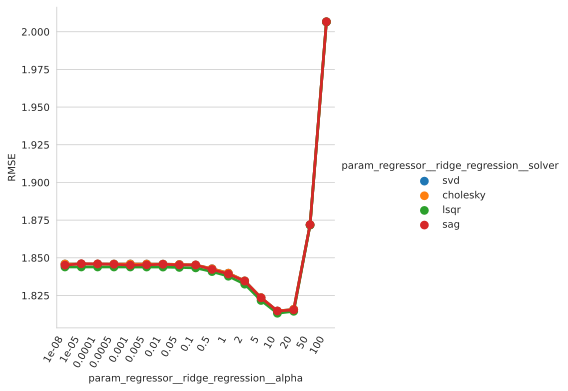

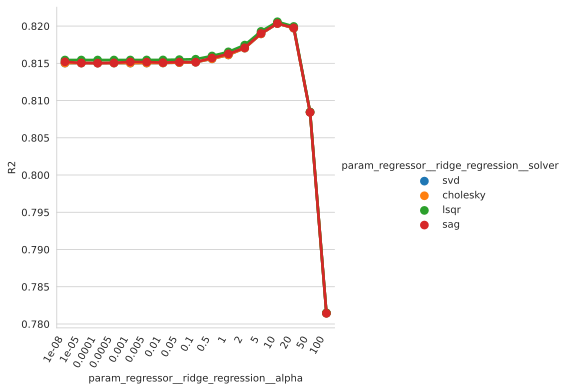

In [14]:
results = pd.DataFrame(search.cv_results_)
cp1 = sns.catplot(x="param_regressor__ridge_regression__alpha", y=-results.mean_test_neg_root_mean_squared_error, hue="param_regressor__ridge_regression__solver", kind="point", data=results)
cp1.set_ylabels('RMSE')
cp1.set_xticklabels(rotation = 60, ha="right")
cp2 = sns.catplot(x="param_regressor__ridge_regression__alpha", y="mean_test_r2", hue="param_regressor__ridge_regression__solver", kind="point", data=results)
cp2.set_ylabels('R2')
cp2.set_xticklabels(rotation = 60, ha="right")

### Performance Evaluation

We now take a look at the performance in terms of the root mean squared error. We can directly use the `GridSearch`-object for prediction (if `refit=True` is set - which is the default in sklearn).


As expected, the training losses are better than the testing losses (which means that the root mean squared error is lower, and the R2-Score is higher). This is the standard result in machine learning tasks, since the testing distribution usually differs at least slightly from the training distribution. Since we used the training data during training, we expect that the model is tuned for this data, which results in slightly better results than for the test data. 

In [15]:
Y_pred_train = search.predict(X_train)
Y_pred_test = search.predict(X_test)
print("Training RMSE: {:.2f}".format(np.sqrt(mean_squared_error(Y_train, Y_pred_train)))) 
print("Test RMSE: {:.2f}".format(np.sqrt(mean_squared_error(Y_test, Y_pred_test))))
print("Training R2: {:.2f}".format(r2_score(Y_train, Y_pred_train))) 
print("Test R2: {:.2f}".format(r2_score(Y_test, Y_pred_test)))

Training RMSE: 1.68
Test RMSE: 2.12
Training R2: 0.86
Test R2: 0.80


Let's check if using the grid search prediction really returns the predictions of the best estimator found. So we can see that using the `refit` option, the model is retrained on the entire training set using the best performing parameters in the grid search.

In [16]:
best_estimator_grid = search.best_estimator_
y_pred_train = best_estimator_grid.predict(X_train)
y_pred_test = best_estimator_grid.predict(X_test)
print("Training RMSE: {:.2f}".format(np.sqrt(mean_squared_error(Y_train, Y_pred_train)))) 
print("Test RMSE: {:.2f}".format(np.sqrt(mean_squared_error(Y_test, Y_pred_test))))

Training RMSE: 1.68
Test RMSE: 2.12


When we plot the predictions versus the labels, we can see that the wrong predictions mostly arise for students with low grades. This observation could help us to improve the model in the future - for example by using a two staged classifier which first predicts if the student has a low grade. 

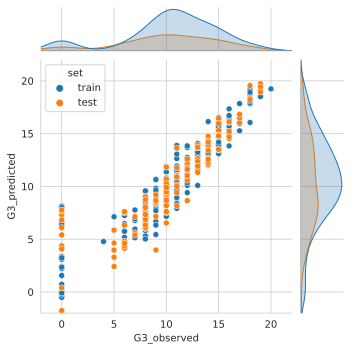

In [17]:
Ys = pd.DataFrame(data={'set': ['train']*len(Y_train),'G3_observed': Y_train.values.ravel(), 'G3_predicted': Y_pred_train.ravel()})
Ys = Ys.append(pd.DataFrame(data={'set': ['test']*len(Y_test),'G3_observed': Y_test.values.ravel(), 'G3_predicted': Y_pred_test.ravel()}))
fg = sns.jointplot(data=Ys,x='G3_observed',y='G3_predicted', hue='set', height=5,xlim=(-2,22), ylim=(-2,22))

### Leave One School Out Cross Validation

One question arising is, if our model trained on one school would correctly predict grades on a different school. To check this hypothesis, we can use a leave one school out crossvalidation. Note that in our case, we have data from two schools, but we have different amount of data collected from each school. This also has an impact on the prediction performance - so in the end it's up to the expert / up to you to draw the right conclusions from this experiment.

We can see that using data from school 1 to predict school 0 yields worse performnce, but using data from school 0 to predict school 1 yields even better performance than the original approach. This indicates that the data imbalance had a significant impact on the outcome of this experiment. 

In [18]:
from sklearn.model_selection import LeaveOneGroupOut
logo = LeaveOneGroupOut()
kk=0
for train, test in logo.split(data.iloc[:,:-1], data.iloc[:,-1], groups=data.school):
    best_estimator_grid.fit(data.iloc[train,:-1],data.iloc[train,-1])
    y_logo_pred_test = best_estimator_grid.predict(data.iloc[test,:-1])
    y_logo_pred_train = best_estimator_grid.predict(data.iloc[train,:-1])
    y_logo_test = data.iloc[test,-1].values.ravel()
    y_logo_train = data.iloc[train,-1].values.ravel()
    print("Predict School " + str(kk) + ":")
    print("Training RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_logo_train, y_logo_pred_train)))) 
    print("Test RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_logo_test, y_logo_pred_test))))
    print("Training R2: {:.2f}".format(r2_score(y_logo_train, y_logo_pred_train)))
    print("Test R2: {:.2f}".format(r2_score(y_logo_test, y_logo_pred_test)))
    print('-----')
    kk=+1

Predict School 0:
Training RMSE: 1.37
Test RMSE: 2.74
Training R2: 0.89
Test R2: 0.65
-----
Predict School 1:
Training RMSE: 1.83
Test RMSE: 1.79
Training R2: 0.84
Test R2: 0.82
-----


### Regression Random Search

Now we show an alternative way of finding suitable hyper parameters: Performing a random search. Instead of trying out all parameters (as done using the grid search), a fixed number of parameter settings are sampled from the specified hyperparameter distributions. 

In [19]:
# evaluate model
cv_kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [20]:
# evaluate model
scores = cross_validate(model, X_train, Y_train, scoring=['neg_root_mean_squared_error', 'r2'], cv=cv_kfold, n_jobs=-1)
print(scores)
print('Mean RMSE: %.3f (%.3f)' % (np.mean(scores['test_neg_root_mean_squared_error']), np.std(scores['test_neg_root_mean_squared_error'])))
print('Mean R2: %.3f (%.3f)' % (np.mean(scores['test_r2']), np.std(scores['test_r2'])))

{'fit_time': array([0.00973773, 0.00956893, 0.00914669, 0.01036406, 0.0139401 ,
       0.01380849, 0.02078342, 0.01470661, 0.01588583, 0.01871634]), 'score_time': array([0.0060823 , 0.00604868, 0.00613165, 0.00600767, 0.00665569,
       0.00675917, 0.00794244, 0.00688028, 0.00698566, 0.00666046]), 'test_neg_root_mean_squared_error': array([-2.07261552, -2.30796545, -2.46871393, -1.80095835, -2.90758966,
       -1.22688249, -1.27031868, -1.41798235, -1.43095316, -1.49408254]), 'test_r2': array([0.81474261, 0.77522762, 0.7939656 , 0.83414171, 0.66032948,
       0.92487688, 0.80035365, 0.77880951, 0.88583952, 0.89298468])}
Mean RMSE: -1.840 (0.545)
Mean R2: 0.816 (0.071)


In [21]:
# define search space
space_randomized = dict()
space_randomized['regressor__ridge_regression__solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space_randomized['regressor__ridge_regression__alpha'] = loguniform(1e-5, 100)

In [22]:
# define search
search_randomized = RandomizedSearchCV(model, space_randomized, n_iter=500, scoring=['neg_root_mean_squared_error','r2'], refit='neg_root_mean_squared_error', n_jobs=-1, cv=cv_kfold, random_state=1)

In [23]:
model.get_params().keys()

dict_keys(['check_inverse', 'func', 'inverse_func', 'regressor__memory', 'regressor__steps', 'regressor__verbose', 'regressor__scaler', 'regressor__ridge_regression', 'regressor__scaler__n_jobs', 'regressor__scaler__remainder', 'regressor__scaler__sparse_threshold', 'regressor__scaler__transformer_weights', 'regressor__scaler__transformers', 'regressor__scaler__verbose', 'regressor__scaler__scaler', 'regressor__scaler__scaler__copy', 'regressor__scaler__scaler__with_mean', 'regressor__scaler__scaler__with_std', 'regressor__ridge_regression__alpha', 'regressor__ridge_regression__copy_X', 'regressor__ridge_regression__fit_intercept', 'regressor__ridge_regression__max_iter', 'regressor__ridge_regression__normalize', 'regressor__ridge_regression__random_state', 'regressor__ridge_regression__solver', 'regressor__ridge_regression__tol', 'regressor', 'transformer__copy', 'transformer__with_mean', 'transformer__with_std', 'transformer'])

In [24]:
# execute search
result_randomized = search_randomized.fit(X_train, Y_train)

Now we can take a look at the results of our search: Even though we used a randomized hyper parameter search, we achieved quite good scores comparable to the ones using a full grid search. 

In [25]:
# summarize result
print('Best Score: %s' % np.absolute(result_randomized.best_score_))
print('Best Hyperparameters: %s' % result_randomized.best_params_)

Best Score: 1.8122075730872567
Best Hyperparameters: {'regressor__ridge_regression__alpha': 17.263652282627163, 'regressor__ridge_regression__solver': 'lsqr'}


In [26]:
print("Training set score: {:.2f}".format(np.absolute(result_randomized.score(X_train, Y_train)))) 
print("Test set score: {:.2f}".format(np.absolute(result_randomized.score(X_test, Y_test))))

Training set score: 1.70
Test set score: 2.11


## 5. Support Vector Classification

Instead of using a simple ridge regression, we will now use a support vector classifier for prediction. We will use the popular radial basis function kernel in our experiments, and therefore the model will be able to find nonlinear classification borders in the data. We could also include other kernels in our grid search, but to save computiation time in this demonstration we only use rbf kernel, as we also have seen in Lab1 that the perfromance of rbf was superior. 

### Data Preperation and Splitting

In this task, we want to perform a binary classification to determine if the student failed (marks 0-9) or succeeded (marks 10-20). For that we perform a binary transformation of the grades into a new column "grades" and drop the old one ("G3"). 

In [27]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
# Assigning grades to the grades according to the following criteria :
# 0  - 9 marks : 0 (failed)
# 10 - 20 marks : 1 (approved)

def grade_binary_transform(g):
    if g > 9:
        return 1
    else: 
        return 0
    

data_c = data.copy()
data_c['grades'] = data_c.apply(lambda x: grade_binary_transform(x['G3']), axis = 1 )
data_c.drop('G3', axis=1, inplace=True)

data_c['grades'].value_counts()

1    265
0    130
Name: grades, dtype: int64

In [28]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(data_c.iloc[:,:-1],data_c.iloc[:,-1],test_size=0.33)

### Pipeline

This time we use the robust scaler in our pipeline, which is robust to outliers. We set up a parametr grid used by our grid search. This time, we are interested in finding the right kernel coefficient (gamma) for our radial basis function kernel as well as the right regularization parameter C. In the first Lab we have already observed that with PCA we could not reduce the dimension of the feature space drastically. Due to this finding, we also want to try out if the PCA can help at all. Sometimes it might not be the best choice to combine linear (PCA) and non-linear (rbf-SVC) methods. We define 2 parameter grids. One with PCA and all possible number of components and one with the PCA set to `'passthrough'`, which means no PCA is done.

In [29]:
from sklearn.preprocessing import RobustScaler
model_svc = Pipeline(steps=[('StandardScaler', StandardScaler()), ('PCA', 'passthrough'), ('SVC', SVC())])

In [30]:
param_grid = [
    {
    'PCA': [PCA()],
    'PCA__n_components': np.arange(X_train_c.shape[1])+1,
    'SVC__kernel': ['rbf'],
    'SVC__C': [0.1, 1, 10, 100],
    'SVC__gamma':[10, 1, 0.1, 0.01, 0.001, 0.0001]
    },
    {
    'PCA': ['passthrough'],
    'SVC__kernel': ['rbf'],
    'SVC__C': [0.1, 1, 10, 100],
    'SVC__gamma':[10, 1, 0.1, 0.01, 0.001, 0.0001]
    }
]

### Gridsearch

We set up anoher grid search for finding the best hyperparameters for our support vector classifier. This time, we use a stratified 10-fold cross validation and the accuracy as metric for evaluation. The stratification ensures to have approx. the same class distribution in test and training set.

In [31]:
# evaluate model
cv_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

In [32]:
# define search
gsearch = GridSearchCV(model_svc, param_grid, scoring='accuracy', n_jobs=-1, cv=cv_kfold)

In [33]:
# execute search
gsearch.fit(X_train_c, y_train_c)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('StandardScaler', StandardScaler()),
                                       ('PCA', 'passthrough'),
                                       ('SVC', SVC())]),
             n_jobs=-1,
             param_grid=[{'PCA': [PCA(n_components=31)],
                          'PCA__n_components': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
                          'SVC__C': [0.1, 1, 10, 100],
                          'SVC__gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001],
                          'SVC__kernel': ['rbf']},
                         {'PCA': ['passthrough'], 'SVC__C': [0.1, 1, 10, 100],
                          'SVC__gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001],
                          'SVC__kernel': ['rbf']}],
             scoring='accuracy')

In [34]:
print(gsearch.best_params_)
print(gsearch.best_score_)

{'PCA': PCA(n_components=31), 'PCA__n_components': 31, 'SVC__C': 100, 'SVC__gamma': 0.001, 'SVC__kernel': 'rbf'}
0.9094017094017094


Again, we store the dict of the cross-validation results in a pandas data-frame to have easier access for plotting.

In [35]:
gresults = pd.DataFrame(gsearch.cv_results_)
gresults

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_PCA,param_PCA__n_components,param_SVC__C,param_SVC__gamma,param_SVC__kernel,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011048,0.001670,0.002554,0.000332,PCA(n_components=31),1,0.1,10,rbf,"{'PCA': PCA(n_components=31), 'PCA__n_componen...",...,0.629630,0.653846,0.653846,0.653846,0.653846,0.653846,0.653846,0.644160,0.011864,783
1,0.007240,0.000577,0.002171,0.000290,PCA(n_components=31),1,0.1,1,rbf,"{'PCA': PCA(n_components=31), 'PCA__n_componen...",...,0.666667,0.653846,0.730769,0.769231,0.653846,0.692308,0.769231,0.708405,0.041163,305
2,0.006699,0.000318,0.002014,0.000177,PCA(n_components=31),1,0.1,0.1,rbf,"{'PCA': PCA(n_components=31), 'PCA__n_componen...",...,0.666667,0.730769,0.730769,0.884615,0.692308,0.692308,0.769231,0.735185,0.059746,284
3,0.007266,0.000831,0.002097,0.000257,PCA(n_components=31),1,0.1,0.01,rbf,"{'PCA': PCA(n_components=31), 'PCA__n_componen...",...,0.629630,0.653846,0.653846,0.653846,0.653846,0.653846,0.653846,0.647863,0.012513,394
4,0.008046,0.001410,0.002480,0.000616,PCA(n_components=31),1,0.1,0.001,rbf,"{'PCA': PCA(n_components=31), 'PCA__n_componen...",...,0.629630,0.653846,0.653846,0.653846,0.653846,0.653846,0.653846,0.647863,0.012513,394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,0.009255,0.002275,0.002467,0.001008,passthrough,NaN,100,1,rbf,"{'PCA': 'passthrough', 'SVC__C': 100, 'SVC__ga...",...,0.629630,0.653846,0.653846,0.653846,0.653846,0.653846,0.653846,0.647863,0.012513,394
788,0.007995,0.000736,0.002127,0.000282,passthrough,NaN,100,0.1,rbf,"{'PCA': 'passthrough', 'SVC__C': 100, 'SVC__ga...",...,0.740741,0.692308,0.769231,0.653846,0.730769,0.884615,0.769231,0.746296,0.058953,268
789,0.006803,0.001367,0.001833,0.000050,passthrough,NaN,100,0.01,rbf,"{'PCA': 'passthrough', 'SVC__C': 100, 'SVC__ga...",...,0.925926,0.807692,0.923077,0.769231,0.884615,0.884615,0.961538,0.874929,0.054370,31
790,0.006649,0.000704,0.002009,0.000234,passthrough,NaN,100,0.001,rbf,"{'PCA': 'passthrough', 'SVC__C': 100, 'SVC__ga...",...,0.851852,0.923077,0.923077,0.846154,0.884615,0.961538,1.000000,0.909402,0.067107,1


In order to plot the results, we first replace all NaN values by zeros.

In the plots, we can see that choosing the right kernel coefficient (gamma) depends on the choice for the regularization parameter. We can also see (depending on gamma) that the PCA might not or only slightly improve the results. 

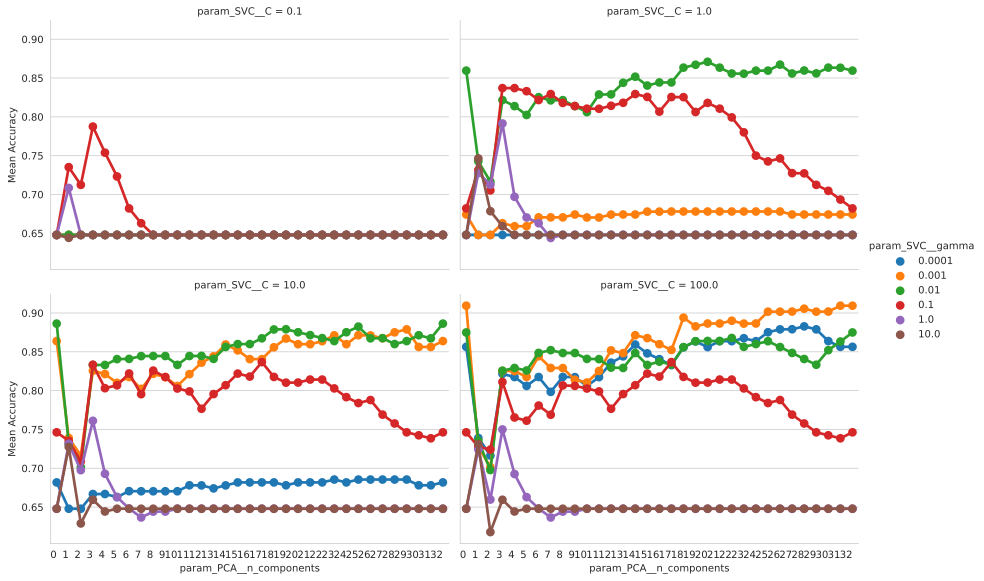

In [36]:
gdata = gresults.fillna(0)
cp = sns.catplot(x="param_PCA__n_components", y="mean_test_score", hue="param_SVC__gamma", col="param_SVC__C" ,kind="point", col_wrap=2,height=4, aspect=1.5, data=gdata)
cp.set_xticklabels(rotation = 0, ha="right")
cp.set_ylabels('Mean Accuracy')

### Performance Evaluation

Now we take a closer look at the performance of our hyperparameter-trained model. We start with printing the classification report. 

In [37]:
y_score_test = gsearch.decision_function(X_test_c)
y_score_train = gsearch.decision_function(X_train_c)
y_pred_train_c = gsearch.predict(X_train_c)
y_pred_test_c = gsearch.predict(X_test_c)

In [38]:
from sklearn.metrics import classification_report
# print classification report
print(classification_report(y_test_c, y_pred_test_c))

              precision    recall  f1-score   support

           0       0.76      0.84      0.79        37
           1       0.93      0.89      0.91        94

    accuracy                           0.88       131
   macro avg       0.84      0.87      0.85       131
weighted avg       0.88      0.88      0.88       131



In order to compare our results, we use a dummy classifier, which will always return the most frequent label as prediction. Using this strategy one yields better than chance performance for imbalanced datasets (as in our case: more "approved" than "failed" labels)

We can see that our model shows in general a better performance. This is the expected behavior, since the dummy model just returns the dummy value, whereas our model has been actually trained on the data in order to make the correct prediction.

In [39]:
from sklearn.dummy import DummyClassifier

dc = DummyClassifier(strategy='most_frequent')
dc.fit(X_train_c,y_train_c)
print(classification_report(y_test_c, dc.predict(X_test_c)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.72      1.00      0.84        94

    accuracy                           0.72       131
   macro avg       0.36      0.50      0.42       131
weighted avg       0.51      0.72      0.60       131



/home/ubuntu/miniconda3/envs/ami/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The ROC curve visualizes, that our model has better sensitivity as well as specivity than the dummy model. As expected, the results for the training data are slightly better than the ones for the test data (which is the usual case for machine learning tasks). We could use the ROC of the training set to further tailor the model to our needs - depending on the impotance of either the TPR or FPR for our task at hands. An ideal classifier would go all the way up to the top left corner with an area under the curve of 1.0.

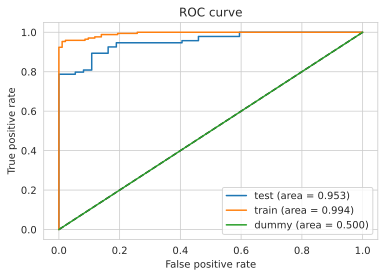

In [40]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(y_test_c, y_score_test)
fprtr, tprtr, thresholdstr = roc_curve(y_train_c, y_score_train)
fprd,tprd, thd = roc_curve(y_test_c,dc.predict_proba(X_test_c)[:,1])
auc_test = auc(fpr, tpr)
auc_train = auc(fprtr, tprtr)
auc_dummy = auc(fprd, tprd)
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='test (area = {:.3f})'.format(auc_test))
plt.plot(fprtr, tprtr, label='train (area = {:.3f})'.format(auc_train))
plt.plot(fprd, tprd, label='dummy (area = {:.3f})'.format(auc_dummy))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

We use a confusion matrix in order to visualize the typical errors made by the predictor. We can see that the wrong predictions are more or less balanced in terms of there are roughly as many false positives as false negatives. This means that there is neither of the classes seems to be systematically misclassified in favor of the other. 

[Text(0.5, 1.0, 'Confusion Matrix for test set')]

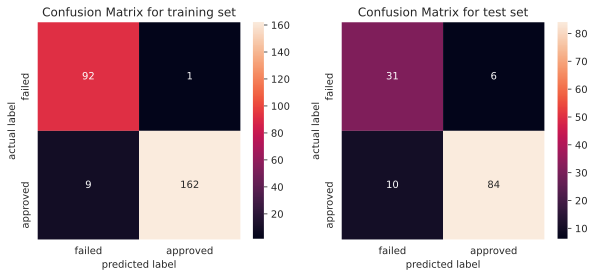

In [41]:
from sklearn.metrics import confusion_matrix

conf_train = confusion_matrix(y_train_c,y_pred_train_c)
conf_test = confusion_matrix(y_test_c,y_pred_test_c)

fg, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))
sns.heatmap(conf_train, annot=True, fmt="d", ax=ax1)
ax1.set(xticklabels=["failed","approved"])
ax1.set(yticklabels=["failed","approved"])
ax1.set(xlabel="predicted label")
ax1.set(ylabel="actual label")
ax1.set(title="Confusion Matrix for training set")
sns.heatmap(conf_test, annot=True, fmt="d", ax=ax2)
ax2.set(xticklabels=["failed","approved"])
ax2.set(yticklabels=["failed","approved"])
ax2.set(xlabel="predicted label")
ax2.set(ylabel="actual label")
ax2.set(title="Confusion Matrix for test set")

Finally, we have a look at the precision-recall curve, which is especially useful when the classes are highly imbalanced (as is the case in our task). We can see that depending on the treshhold of the distance to the decistion boundery, we have a very high precision. However, for threshholds yielding high precision we end up with low recall values, which indicates a high number of false negatives. Selecting the right thershhold therefore depends on the specific task at hand.

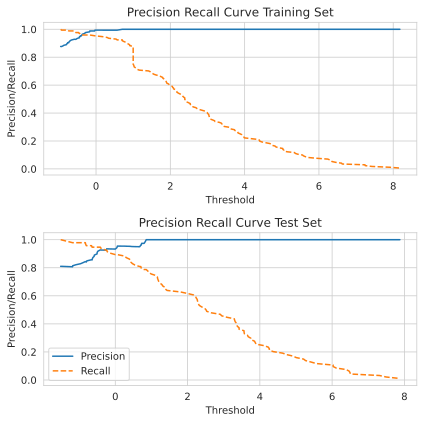

In [42]:
from sklearn.metrics import precision_recall_curve

precisionstr, recallstr, thresholdstr = precision_recall_curve(y_train_c, y_score_train)
precisions, recalls, thresholds = precision_recall_curve(y_test_c, y_score_test)

fg, (ax1, ax2) = plt.subplots(2,1,figsize=(6,6))
ax1.plot(thresholdstr, precisionstr[:-1], label="Precision")
ax1.plot(thresholdstr, recallstr[:-1], "--", label="Recall")
ax1.set_xlabel('Threshold')
ax1.set_ylabel('Precision/Recall')
ax1.set_title('Precision Recall Curve Training Set')
ax2.plot(thresholds, precisions[:-1], label="Precision")
ax2.plot(thresholds, recalls[:-1], "--", label="Recall")
ax2.set_xlabel('Threshold')
ax2.set_ylabel('Precision/Recall')
ax2.set_title('Precision Recall Curve Test Set')
plt.legend(loc='best')
fg.tight_layout()